# Modelo de Machine Learning para la Predicción Salarial 

En el actual panorama laboral, comprender y prever los salarios es esencial para empleadores y empleados por igual. Con el objetivo de facilitar este proceso, hemos desarrollado un modelo de machine learning basado en el conjunto de datos "Salary_Data". Este conjunto de datos, recopilado a partir de diversas fuentes que incluyen encuestas, sitios de ofertas de trabajo y otras fuentes públicas, consta de un total de 6704 puntos de datos, cada uno con información detallada sobre edad, experiencia laboral, rol laboral, nivel educativo y salario.

## Características del Conjunto de Datos:

1. **Edad:** La edad de los individuos, un factor importante que puede influir en el nivel salarial.
2. **Genero**: Esta compuesto por valores de femenimo, masculinos y otros
3. **Experiencia:** La experiencia laboral acumulada por los individuos en años.
4. **Rol Laboral:** El título del trabajo que desempeñan los individuos. Incluye roles como ingeniero de software, analista de datos, gerente senior, asociado de ventas, entre otros.
5. **Nivel Educativo:** El nivel de educación alcanzado por los individuos. Tales como "Bachelor's": Licenciatura. "Master's": Maestría. 'PhD': Doctorado. NaN: Valor nulo (no disponible). "Bachelor's Degree": Título de licenciatura.
"Master's Degree": Título de maestría. 'High School': Educación secundaria. 'phD': Doctorado.
6. **Salario:** La variable objetivo que buscamos prever.


## Objetivo del Modelo:

El objetivo principal de nuestro modelo de machine learning es prever los salarios en función de las características proporcionadas. Al comprender las relaciones entre la edad, la experiencia, el rol laboral y el nivel educativo, esperamos proporcionar a los empleadores y empleados una herramienta valiosa para estimar salarios de manera precisa y eficiente.

## Metodología:

Utilizaremos técnicas avanzadas de machine learning, como regresión, para analizar la relación entre las variables independientes (edad, experiencia, rol laboral, nivel educativo) y la variable dependiente (salario). El modelo se entrenará utilizando una parte del conjunto de datos y se evaluará en otra parte para garantizar su capacidad para generalizar a nuevos datos.

En resumen, nuestro modelo de machine learning busca simplificar el proceso de estimación salarial, aprovechando la riqueza de información proporcionada por el conjunto de datos "Salary_Data". Este enfoque tiene el potencial de mejorar la toma de decisiones salariales y optimizar la asignación de recursos en el ámbito laboral actual.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import set_config

set_config(display="diagram")

In [7]:
df= pd.read_csv('Salary_Data.csv')

In [8]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6702.0,33.620859,7.614633,21.0,28.0,32.0,38.0,62.0
Years of Experience,6701.0,8.094687,6.059003,0.0,3.0,7.0,12.0,34.0
Salary,6699.0,115326.964771,52786.183911,350.0,70000.0,115000.0,160000.0,250000.0


Edad: La edad minima de las personas entrevistadas es de 21 y la edad máxima es de 62, con un promedio de 62 años.
Años de experiencia: En la pobación encuestada se observan personas sin experencia hasta personas con experiencia de 34 años con una media de 8 años.
Salarios: Los salarios de la población encuestada van desde 350 hasta 250000

In [11]:
#Composición de las variables
import pandas as pd

# Suponiendo que df es tu DataFrame y 'age' es la columna de interés
unique_gender_values = df['Gender'].unique()

print("Valores únicos en la variable 'genero':")
print(unique_gender_values)

#age
unique_age_values = df['Age'].unique()
print("Valores únicos en la variable 'edad':")
print(unique_age_values)


#Nivel educativo
unique_niveleducativo_values = df['Education Level'].unique()
print("Valores únicos en la variable 'nivel educativo':")
print(unique_niveleducativo_values)


#Job Title
unique_JobTitle_values = df['Job Title'].unique()
print("Valores únicos en la variable 'Job Title':")
print(unique_JobTitle_values)




Valores únicos en la variable 'genero':
['Male' 'Female' nan 'Other']
Valores únicos en la variable 'edad':
[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. nan 61. 57. 62. 55.
 56. 54. 60. 58. 22. 21.]
Valores únicos en la variable 'nivel educativo':
["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
Valores únicos en la variable 'Job Title':
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Co

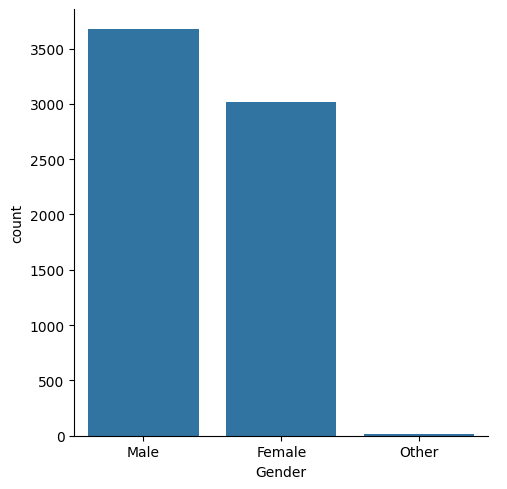

In [12]:
#Por geenero
import seaborn as sns
import matplotlib.pyplot as plt


sns.catplot(data=df, x="Gender", kind="count")
plt.show()  

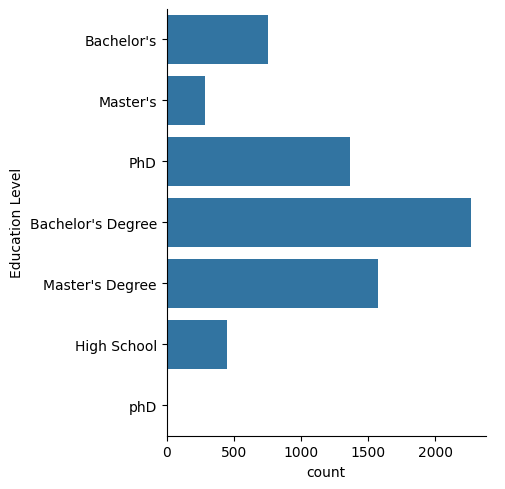

In [13]:
sns.catplot(data=df, y="Education Level", kind="count")
plt.show() 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

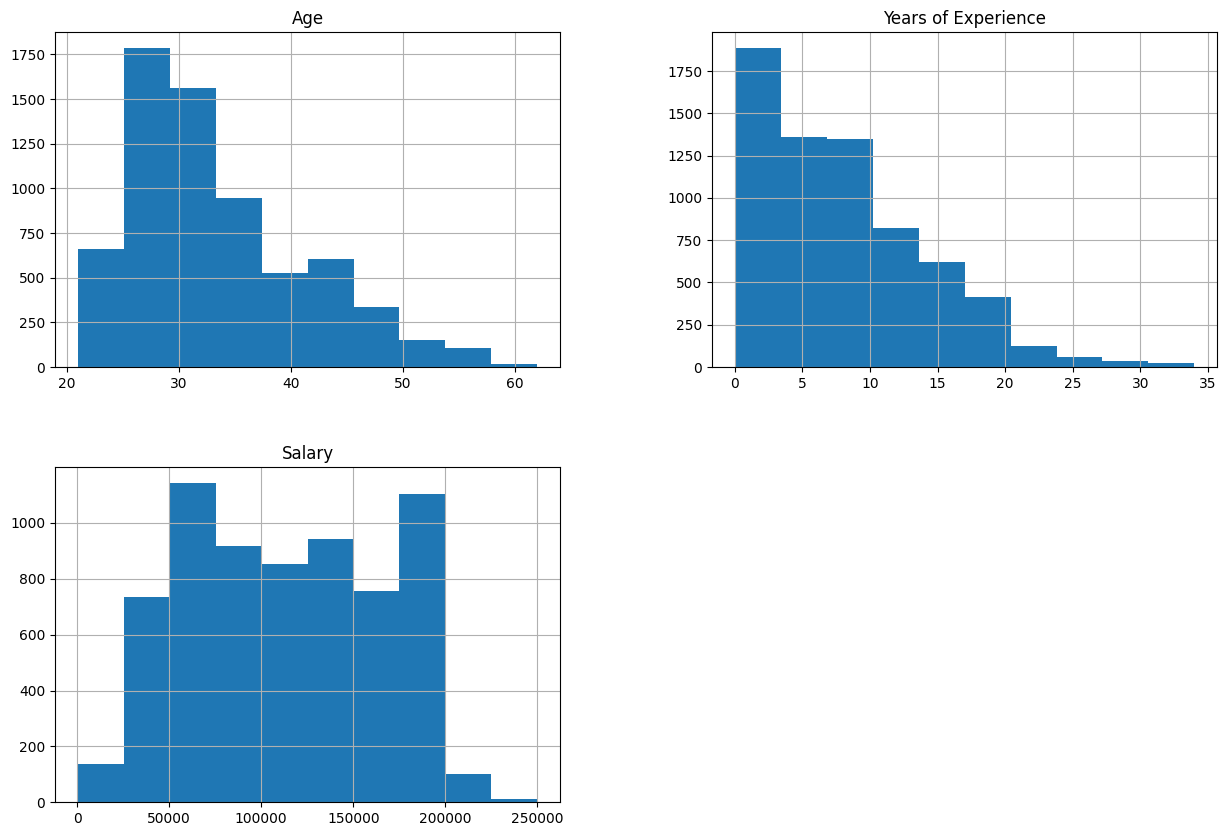

In [14]:
df.hist(figsize=(15,10))

<Axes: xlabel='Years of Experience', ylabel='Salary'>

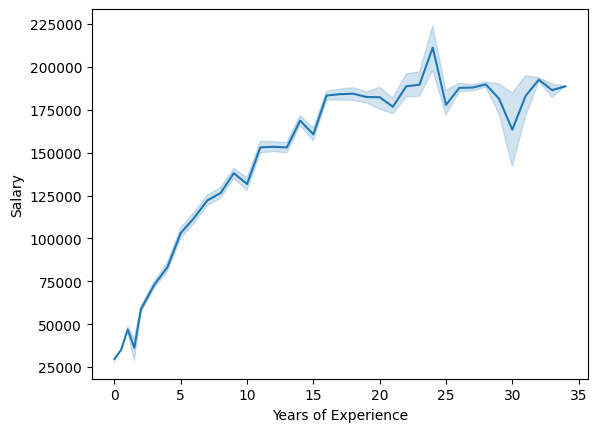

In [15]:
sns.lineplot(data = df,x = "Years of Experience",y = "Salary")

<Axes: xlabel='Age', ylabel='Salary'>

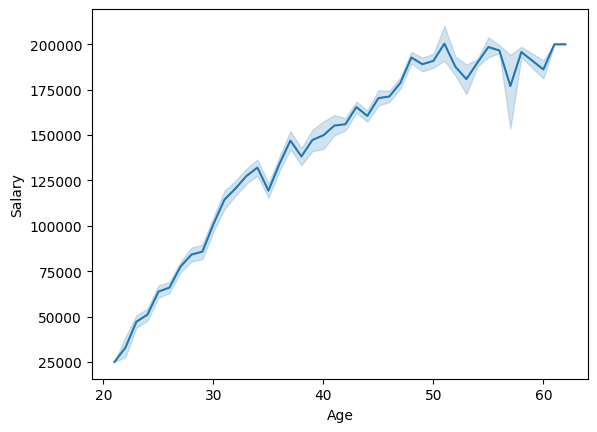

In [16]:
sns.lineplot(data = df,x = "Age",y = "Salary")

Se observa que la edad y los años de experiencia ayudan a describir muy bien la variable objetivo, ya que en la medida que los encuestados tienen mayos edad y por tanto mayo experiencia, nu nivel de salario también aumenta.